### Worksheet 

The following questions will be centred around creating different plots - the answers will be entirely subjective for the most part, with how you approach the problem entirely up to personal preference. 

### Question 1

Create a simple lineplot of cumulative coronavirus deaths in Ireland vs. United Kingdom using the following [data](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv). Be sure to label the x axis with dates (Last_update object). 


If this looks a little hard to read, try to adjust the scale (maybe plot on a log scale?). 


**Hint - use np.log() for transformations if using matplotlib**

In [2]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle

In [83]:
# Load dataset.
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv")

# Check data structure.
df.head(4)
print(f"\nThe dataframe has {df.shape[0]} rows and {df.shape[1]} columns\n")
#print(df.loc[1:4,"Country_Region":"Deaths"])


The dataframe has 25725 rows and 16 columns



In [84]:
# Assign dates and deaths of Ireland to variables. Do so by subsetting the dataframe when Country is Ireland.
dates_ire = df[df["Country_Region"] == "Ireland"]["Report_Date_String"]
deaths_ire = df[df["Country_Region"] == "Ireland"]["Deaths"]

# Repeat for the UK.
dates_uk = df[df["Country_Region"] == "United Kingdom"]["Report_Date_String"]
deaths_uk = df[df["Country_Region"] == "United Kingdom"]["Deaths"]

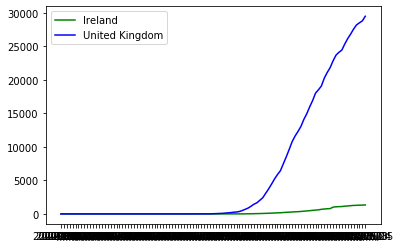

In [85]:
# Plot.
plt.figure()
plt.plot(dates_ire, deaths_ire, "green", label = "Ireland")
plt.plot(dates_uk, deaths_uk, "blue", label = "United Kingdom")
plt.legend()

/home/josemari/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


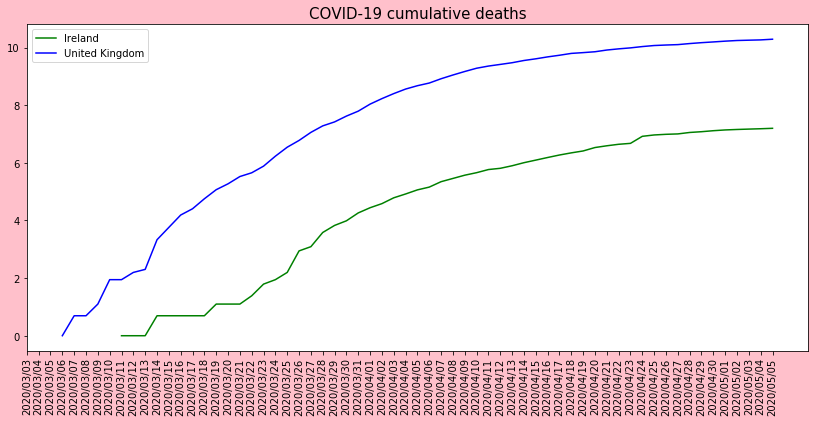

In [86]:
# Get logarithm of deaths.
deaths_ire_log = np.log(df[df["Country_Region"] == "Ireland"]["Deaths"])
deaths_uk_log = np.log(df[df["Country_Region"] == "United Kingdom"]["Deaths"])

# Plot with logarithmic scale.
plt.figure(figsize = (14, 6), facecolor = "pink")
plt.plot(dates_ire, deaths_ire_log, "green", label = "Ireland")
plt.plot(dates_uk, deaths_uk_log, "blue", label = "United Kingdom")
plt.xticks(rotation = 90)
plt.title("COVID-19 cumulative deaths", size = 15)
plt.legend()

Try adding another country to this comparison - I would suggest France

/home/josemari/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0.98, 'COVID-19 cumulative deaths: linear VS logarithmic scale')

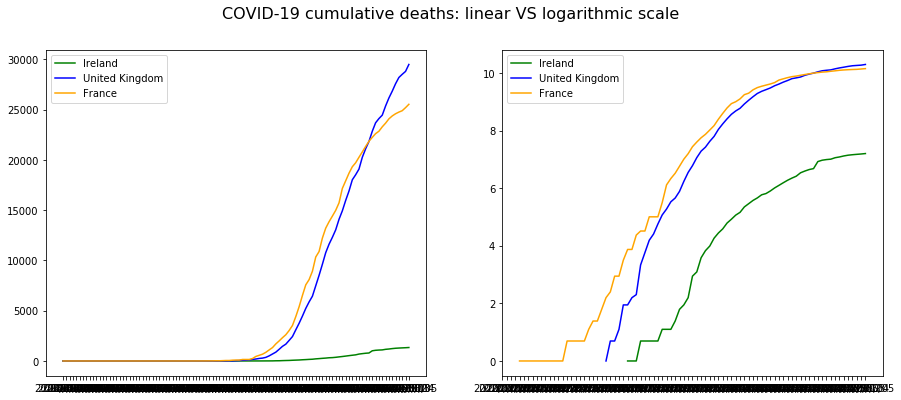

In [91]:
# Get France data.
dates_fra = df[df["Country_Region"] == "France"]["Report_Date_String"]
deaths_fra = df[df["Country_Region"] == "France"]["Deaths"]
deaths_fra_log = np.log(df[df["Country_Region"] == "France"]["Deaths"])

# Create a canvas with two colums (two separated canvas).
fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
# Plot with linear scale.
ax1.plot(dates_ire, deaths_ire, color = "green", label = "Ireland")
ax1.plot(dates_uk, deaths_uk, color = "blue", label = "United Kingdom")
ax1.plot(dates_fra, deaths_fra, color = "orange", label = "France")
ax1.legend()

# Plot with logarithmic scale.
ax2.plot(dates_ire, deaths_ire_log, "green", label = "Ireland")
ax2.plot(dates_uk, deaths_uk_log, "blue", label = "United Kingdom")
ax2.plot(dates_fra, deaths_fra_log, "orange", label = "France")
ax2.legend()
fig.suptitle("COVID-19 cumulative deaths: linear VS logarithmic scale", fontsize = 16)

### Question 2 


Create a gridded set of plots to visualise the relationship between sepal length and sepal width across 3 species and in all species using the iris [dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv). 

**Note - if using matplotlib with plt.subplots, you'll have to refer to declared axes like this - 
`fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)` where the first set of axes (ax1 and ax2) refer to the first row and the second (ax3 and ax4) refer to the second row, and so get their own set of brackets**

In [3]:
# Load dataset.
df_2 = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
# Check data structure.
df_2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# Asign the sepal_length and sepal_width of all species to variables and sort them so the values plot in order.
length_set = sorted(df_2[df_2["species"] == "setosa"]["sepal_length"])
length_ver = sorted(df_2[df_2["species"] == "versicolor"]["sepal_length"])
length_vir = sorted(df_2[df_2["species"] == "virginica"]["sepal_length"])
width_set = sorted(df_2[df_2["species"] == "setosa"]["sepal_width"])
width_ver = sorted(df_2[df_2["species"] == "versicolor"]["sepal_width"])
width_vir = sorted(df_2[df_2["species"] == "virginica"]["sepal_width"])

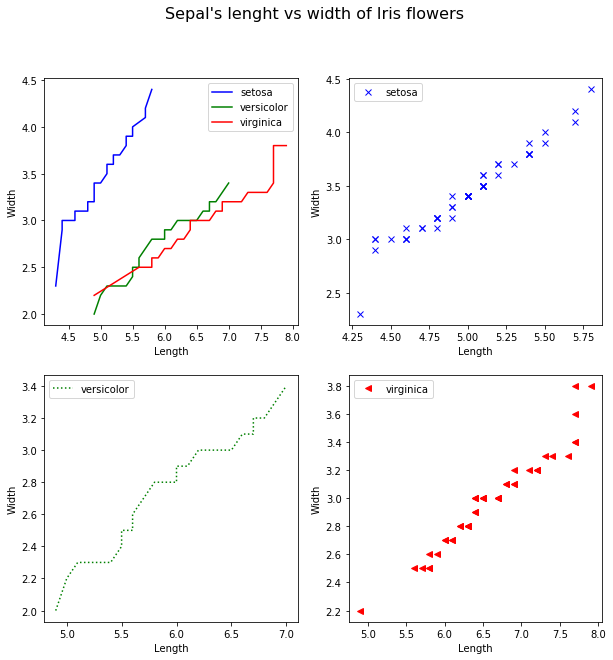

In [94]:
# Plot a figure with four axes (canvas), each braket pair representing a new line.
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
fig.suptitle("Sepal's lenght vs width of Iris flowers", fontsize = 16)

# Plot the three species in axis 1 with axis labels and legend.
ax1.plot(length_set, width_set, color = "blue", label = "setosa")
ax1.plot(length_ver, width_ver, color = "green", label = "versicolor")
ax1.plot(length_vir, width_vir, color = "red", label = "virginica")
ax1.set_xlabel("Length", fontsize = 10)
ax1.set_ylabel("Width", fontsize = 10)
ax1.legend()

# Next axis are one for each species (practice on each one with different plotting styles).
ax2.plot(length_set, width_set, "bx", label = "setosa")
ax2.set_xlabel("Length", fontsize = 10)
ax2.set_ylabel("Width", fontsize = 10)
ax2.legend()
ax3.plot(length_ver, width_ver, "g:", label = "versicolor")
ax3.set_xlabel("Length", fontsize = 10)
ax3.set_ylabel("Width", fontsize = 10)
ax3.legend()
ax4.plot(length_vir, width_vir, "r<", label = "virginica")
ax4.set_xlabel("Length", fontsize = 10)
ax4.set_ylabel("Width", fontsize = 10)
ax4.legend()

# Save the image in current directory.
fig.savefig('iris_flowers.jpg')

### Question 3

Create a plot to visualise the differences between petal length across species.

Text(0.5, 1.0, 'Petal lengths with colours')

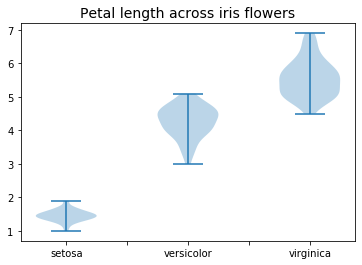

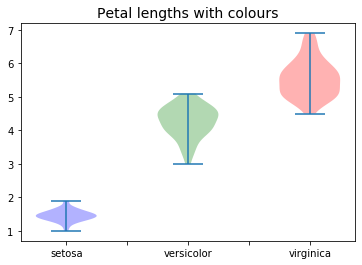

In [6]:
# Get the petal lengths into variables.
pet_length_set = df_2[df_2["species"] == "setosa"]["petal_length"]
pet_length_ver = df_2[df_2["species"] == "versicolor"]["petal_length"]
pet_length_vir = df_2[df_2["species"] == "virginica"]["petal_length"]

# Make a figure with one single canvas.
fig, ax = plt.subplots()
# Get all data to be ploted in a single object.
data_to_plot = [pet_length_set, pet_length_ver, pet_length_vir]
# Make a violin plot.
ax.violinplot(data_to_plot)
# Adjust manually the possition of the x labels.
ax.set_xticklabels(["", "setosa", "", "versicolor", "", "virginica"])
ax.set_title("Petal length across iris flowers", size = 14)

# Make a better violin plot.
fig, ax = plt.subplots()
vplot = ax.violinplot(data_to_plot,positions = [1, 2, 3])
ax.set_xticklabels(["", "setosa", "", "versicolor", "", "virginica"])
colours = ["blue", "green", "red"]

# Color the patches acording to the colors list.
for bodie, colour in zip(vplot["bodies"], colours):
        bodie.set_facecolor(colour)
ax.set_title("Petal lengths with colours", size = 14)

Do the same on a different scale (log)

Text(0.5, 1.0, 'Petal lengths with colours; log. scale')

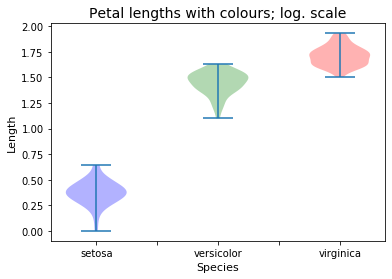

In [19]:
# Get the logarithmic data in a single object.
data_to_plot = [np.log(pet_length_set), np.log(pet_length_ver), np.log(pet_length_vir)]

# Make violin plot.
fig, ax = plt.subplots()
vplot = ax.violinplot(data_to_plot)
ax.set_xticklabels(["", "setosa", "", "versicolor", "", "virginica"])
ax.set_xlabel("Species", size = 11)
ax.set_ylabel("Length", size = 11)

# Color the patches acording to the colors list.
colours = ["blue", "green", "red"]
for bodie, colour in zip(vplot["bodies"], colours):
        bodie.set_facecolor(colour)
ax.set_title("Petal lengths with colours; log. scale", size = 14)